In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import anndata
import scanpy.api as sc
import louvain
import scrublet as scr
import scipy.io

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=100)

scanpy==1.3.2 anndata==0.6.10 numpy==1.14.3 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.0 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


### Download 8k PBMC dataset from 10x

In [3]:
!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz

--2018-10-16 14:46:10--  http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 52.85.80.82, 52.85.80.198, 52.85.80.64, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|52.85.80.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37558165 (36M) [application/x-tar]
Saving to: ‘pbmc8k_filtered_gene_bc_matrices.tar.gz’

pbmc8k_filtered_gen 100%[===================>]  35.82M  6.30MB/s    in 7.1s    

2018-10-16 14:46:18 (5.08 MB/s) - ‘pbmc8k_filtered_gene_bc_matrices.tar.gz’ saved [37558165/37558165]



In [5]:
!tar xfz pbmc8k_filtered_gene_bc_matrices.tar.gz

In [7]:
!ls filtered_gene_bc_matrices/

GRCh38 hg19


In [8]:
input_dir = 'filtered_gene_bc_matrices/GRCh38/'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + 'genes.tsv', delimiter='\t', column=1))

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 8381 rows, 33694 columns
Number of genes in gene list: 33694


In [9]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)


In [10]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.3%
Estimated detectable doublet fraction = 61.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.0%
Elapsed time: 14.5 seconds


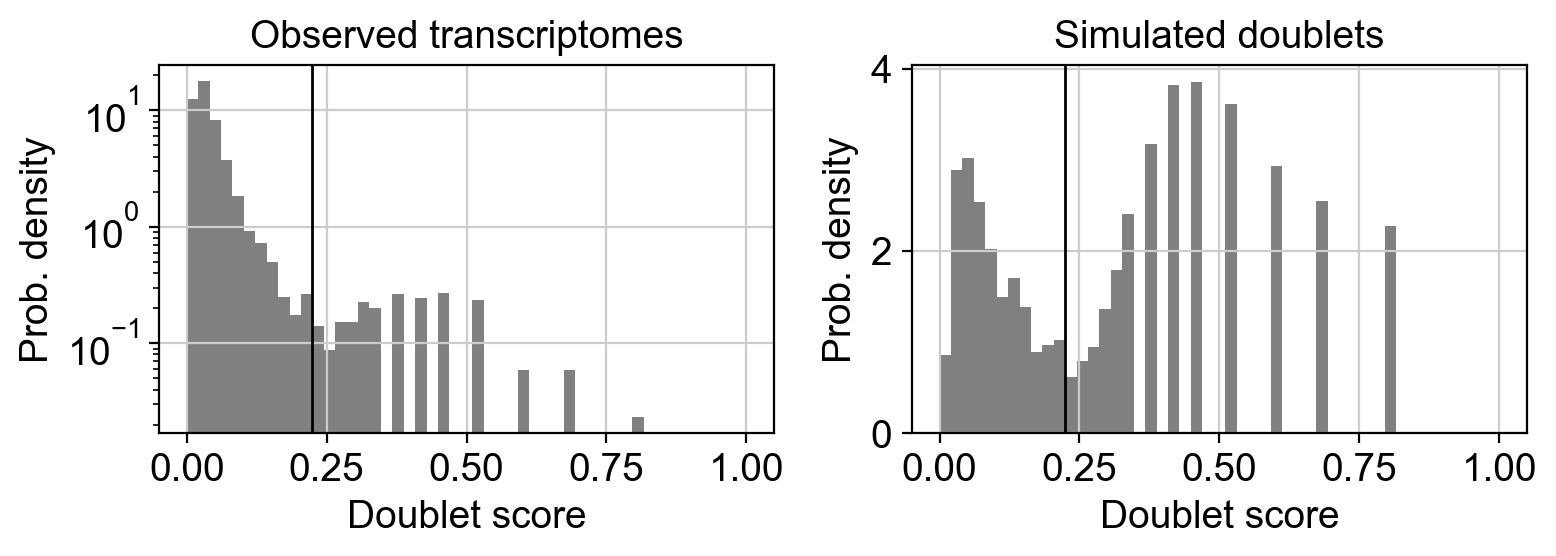

In [11]:
scrub.plot_histogram();